<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/MARCA-Color.jpg" title="Title text" width="50%" height="50%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales II-2018 </h1>

<H3 align='center'> Tarea 2 - Redes Convolucionales y sus aplicaciones </H3>
<hr style="height:2px;border:none"/>


<hr style="height:2px;border:none"/>
<H3 align='center'> Gabriel Rudloff </H3>
<H3 align='center'> José Pablo Fuenzalida </H3>
<hr style="height:2px;border:none"/>



**Temas**  
* Diseño y entrenamiento de Redes Neuronales Convolucionales (CNNs).
* Regularización en Redes Convolucionales.
* *Transfer Learning.*
* Aplicaciones de las Redes Neuronales Convolucionales

**Formalidades**  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* **Fecha de entrega y discusión: 23 de Noviembre**
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<margarita.bugueno.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<cvalle@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea2-INF395-II-2018] 

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Convolutional Neural Networks (CNN) en CIFAR.  
[2.](#segundo) Transfer Learning.   
[3.](#tercero) Convolutional Neural Network sobre texto.


### **Nota Importante:**  
Para esta actividad **si es que no se cuenta con GPU** se recomienda utilizar el entorno virtual de __[Colaboratory - Google](https://colab.research.google.com/)__* . Así, podrá programar en la nube con recursos elevados y luego descargar el Jupyter Notebook y entregarlo en modo Informe.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import seaborn as sns
import matplotlib.cm as cm
import os   
import keras as krs
import math


from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, rmsprop
from keras.layers.core import Dense, Activation
from keras.layers import Dense, Activation
from keras import backend as bknd
from keras.datasets import cifar10
from keras import utils as np_utils
from keras.callbacks import LearningRateScheduler
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l1,l2
import pickle
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


<a id="primero"></a>
## 1. Convolutional Neural Networks (CNN) en CIFAR 

En esta sección trabajaremos con un dataset bastante conocido y utilizado por la comunidad para experimentar reconocimiento de objetos en imágenes: CIFAR10 [3]. Se trata de un conjunto de 60.000 imágenes RGB de 32 × 32 pixeles que contiene 10 clases de objetos y 6000 ejemplos por clase. La versión utilizada se le atribuye a *A. Krizhevsky, V. Nair* y *G. Hinton* y viene separada en 50000 ejemplos de entrenamiento y 10000 casos de prueba que fueron obtenidos seleccionando 1000 imágenes aleatorias de cada clase.  
Los datos restantes han sido ordenados aleatoriamente y están organizados en 5 bloques de entrenamiento o batches. Cabe destacar que las clases son mutuamente excluyentes y corresponden a las siguientes categorı́as: 

* Gato
* Perro
* Rana
* Caballo
* Pájaro
* Ciervo
* Avión
* Automóvil
* Camión 
* Barco

Para esta tarea se experimentará con redes convolucionales, conocidas como CNNs ó ConvNets.  
**Nota:** Para esta actividad es bastante aconsejable entrenar las redes usando una GPU, ya que de otro modo los tiempos de entrenamiento serán largos. Recuerde instalar Keras con gpu y el driver de cuda para la tarjeta gráfica.  

# **a)**  Definición de funciones y carga de datos

Construya una función que cargue todos los bloques de entrenamiento y pruebas del problema CIFAR generando como salida:  
(i) dos matrices  Xtr, Ytr; correspondientes a las imágenes y etiquetas de entrenamiento  
(ii) dos matrices Xt, Yt; correspondientes a las imágenes y etiquetas de pruebas  
(iii) dos matrices Xv, Yv; correspondientes a las imágenes y etiquetas que se usarán como conjunto de validación (para tomar decisiones de diseño acerca del modelo)  

> **Este último conjunto debe ser extraı́do desde el conjunto de entrenamiento original y no debe superar las 5000 imágenes.**

> ```python
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  
import numpy as np   
import os   
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
```

> **<font size="4">Funciones útiles</font>**

Se crean funciones para operar los conjuntos. 

La primera se encarga de repartir la muestra en tres conjuntos, conjunto de entrenamiento, de prueba y de validación. Se prefiere evitar que esta función cargue datos para evitar recargas en caso de querer modificar el tamaño de los sub-conjuntos.

La segunda  función se utiliza para crear histogramas de los datos a analizar.

La tercera función es el decaimiento de la taza de aprendizaje. Su objetivo es reducir la variación del efecto del aprendizaje a medida que converge a un modelo.

In [0]:
def Repartir_Conjuntos(Train,Test,x,y):
  print("This function splits the framework this way:\n Train from 0% to (First parameter)%\n Test from (First parameter)% to (First+Second parameter)%\n Validation will be the rest.")
  if (0<Train<1) == False:
    print("ERROR: First parameter must be type float between 0 and 1")
    return
  if (0<Test<1) == False:
    print("ERROR: Second parameter must be type float between 0 and 1")
    return
  if (Train+Test<1) == False:
    print("ERROR: First parameter plus Second parameter can't be bigger than one")
    return
  
  largo = len(x);
  Train=int(Train*largo);
  Test = int(Test*largo + Train);
  (x_train, y_train)=x[0:Train],y[0:Train];
  (x_test, y_test)=x[Train:Test],y[Train:Test];
  (x_val, y_val)=x[Test:],y[Test:];
  return((x_train, y_train),(x_test, y_test),(x_val, y_val))


def Barras(cjto):
  lista = []
  
  for i in cjto:
    flag = True
    indice = 0
    for j in i:
      if j.size != 1:
        print(j)
      if int(j)==1:
        flag = False
      if flag:
        indice += 1
    lista.append(label_names[indice])

  lista=np.array(lista)

  d={}
  for i in lista:
    if i not in d:
      d[i]=1
    else:
      d[i]+=1
  print(d.items())
      
  plt.bar(range(len(d)), list(d.values()), align='center')
  plt.xticks(range(len(d)), list(d.keys()))
  
  return

def my_step_decay(epoch):
    initial_lrate = 0.001
    lrate = initial_lrate * math.pow(0.5, math.floor((1+epoch)/5))
    lrate = max(lrate,0.00001)
    return lrate

<font size="4">Importado de datos</font>

Se importa el conjunto de imágenes y se divide en los grupos correspondientes.
La lista label_names incluye el nombre de las distintas opciones de clasificación para los conjuntos.
Se procede también a imprimir un par de imágenes junto con su respectivo label para comprender los datos obtenidos.

In [4]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  

(x_train, y_train), (x_test, y_test)  = cifar10.load_data()

x=np.concatenate((x_train,x_test), axis=0);
y=np.concatenate((y_train,y_test), axis=0);

170500096/170498071 [==============================] - 33s 0us/step


50000 10000 10000


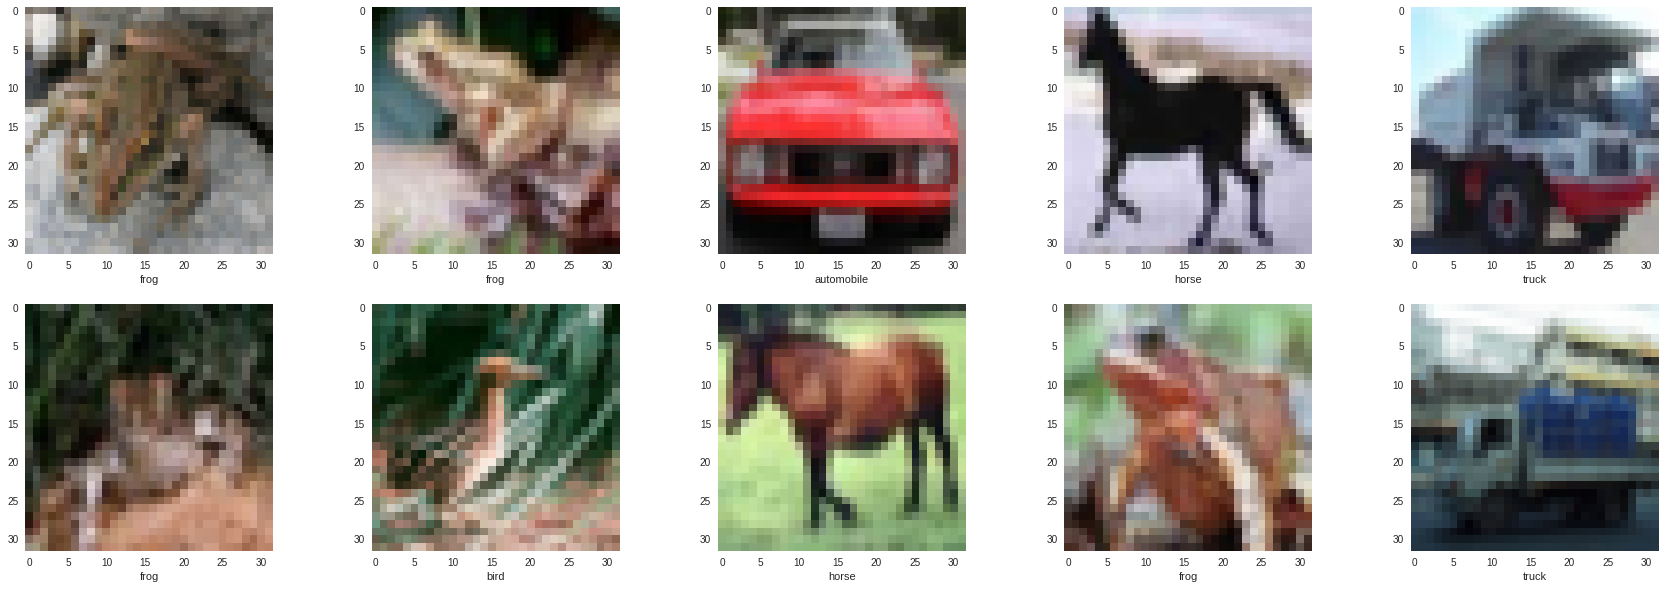

In [5]:
import matplotlib.pyplot as plt
print(len(x_train),
len(x_test),
len(y_test))
#  x_train           Arreglo de imagenes
#  x_train[x]        Una imagen
#  x_train[x][y]     Un pixel RGB
#  x_train[x][y][z]  Un canal del RGB
#  y_train[x]        Indice de la respuesta en label_names, entero de 0 a 9      

import random

fig = plt.figure(figsize=(30,10))
plt.tight_layout()
for i in range(10):
  plt.subplot(2,5,i+1)
  img=int(random.random()*len(x))
  plt.xlabel(label_names[y[img][0]])
  plt.imshow(x[img])
  plt.grid(False)

# **b)**  Prearación de conjuntos









Prepare subconjuntos de entrenamiento, validación y pruebas normalizando las imágenes de entrenamiento y pruebas, dividiendo las intensidades originales de pixel en cada canal por 255.  Es importante notar que si desea trabajar con el orden de las dimensiones denominado ’tf’ (por defecto para TensorFlow) deberá realizar la transposición correspondiente para dejar el canal en donde corresponda. Finalmente, genere una representación adecuada de las salidas deseadas de la red.
```python
import keras
x_train = x_train.transpose([0, 3, 1, 2]) #only if 'tf' dim-ordering is to be used
x_test= x_test.transpose([0, 3, 1, 2]) #remove if 'th' dim-ordering is to be used
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
```

<font size="4">Definición de los conjuntos</font>

In [6]:
[[x_train, y_train],[x_test, y_test],[x_val, y_val]]=Repartir_Conjuntos(0.5,0.3,x,y)
x_train_norm = x_train/255
x_test_norm = x_test/255
x_val_norm = x_val/255

This function splits the framework this way:
 Train from 0% to (First parameter)%
 Test from (First parameter)% to (First+Second parameter)%
 Validation will be the rest.


El siguiente código transforma  los conjuntos y de [ 6 ] a [ 0,0,0,0,0,1,0,0,0,0].

Se opta por usar la modalidad Theanos 'th' para ordenar las matrices (rows, cols, input_depth, depth) por su compatibilidad con imshow.

In [0]:
#x_train_norm_trans = x_train.transpose([0, 3, 1, 2]) #only if 'tf' dim-ordering is to be used
#x_test_norm_trans = x_test.transpose([0, 3, 1, 2]) #remove if 'th' dim-ordering is to be used
#x_val_norm_trans = x_val.transpose([0, 3, 1, 2]) 

num_classes=10

y_train_categ = krs.utils.to_categorical(y_train, num_classes)
y_test_categ = krs.utils.to_categorical(y_test, num_classes)
y_val_categ = krs.utils.to_categorical(y_val, num_classes)

Se grafica un histograma de cada salida en la red para los subconjuntos train, test, y val respectivamente.

dict_items([('frog', 3016), ('truck', 2995), ('deer', 2999), ('automobile', 3023), ('bird', 3007), ('horse', 3042), ('ship', 2973), ('cat', 3008), ('dog', 2954), ('airplane', 2983)])
dict_items([('airplane', 1820), ('frog', 1780), ('bird', 1806), ('horse', 1757), ('automobile', 1775), ('deer', 1829), ('dog', 1848), ('cat', 1778), ('ship', 1812), ('truck', 1795)])
dict_items([('automobile', 1202), ('airplane', 1197), ('bird', 1187), ('dog', 1198), ('cat', 1214), ('deer', 1172), ('truck', 1210), ('horse', 1201), ('frog', 1204), ('ship', 1215)])


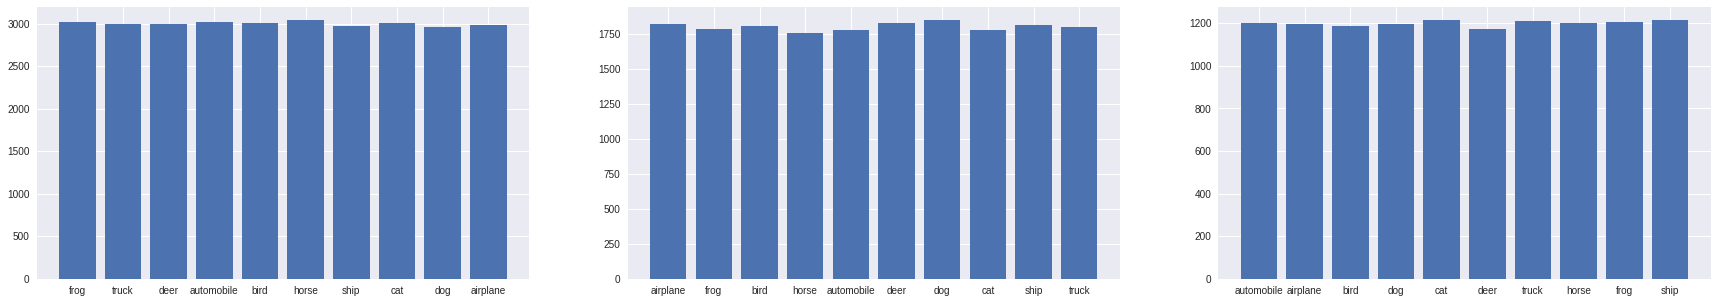

In [8]:
plt.figure(figsize=(30,5))

plt.subplot(131)
Barras(y_train_categ)
plt.subplot(132)
Barras(y_test_categ)
plt.subplot(133)
Barras(y_val_categ)

Se observa que los tres dataframes son relativamente uniformes.

# **c)** Primer acercamiento a una CNN

Defina una CNN con arquitectura $C \times P \times C \times P \times F \times F$. Para ambas capas convolucionales utilice 64 filtros de $3 \times 3$ y funciones de activación ReLU. Para las capas de pooling utilice filtros de $2 \times 2$ con stride 2. Para la capa MLP escondida use 512 neuronas. Genere un esquema lo más compacto posible que muestre los cambios de forma (dimensionalidad) que experimenta un patrón de entrada a medida que se ejecuta un forward-pass y el número de parámetros de cada capa.
```python
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
```


In [9]:
#from keras import backend as K
#K.set_image_dim_ordering('th')

modelc = Sequential()
modelc.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
modelc.add(Activation('relu'))
modelc.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
modelc.add(Conv2D(64, (3, 3), padding='same'))
modelc.add(Activation('relu'))
modelc.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
modelc.add(Flatten())
modelc.add(Dense(512))
modelc.add(Activation('relu'))
modelc.add(Dense(10))
modelc.add(Activation('softmax'))
modelc.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

Se genera la representación de la red neuronal convolucional pedida. 

Se nota que keras presenta como si fuese una capa aparte la activación carente de parámetros el pooling y el flatten.


# **d)** Primera prueba de la CNN

Entrene la CNN definida en **c)** utilizando SGD. En este dataset, una tasa de aprendizaje “segura” es $\eta = 10^{-4}$ o inferior, pero durante las primeras *epochs* el entrenamiento resulta demasiado lento. Para resolver el problema aprenderemos a controlar la tasa de aprendizaje utilizada en el entrenamiento. Implemente la siguiente idea: deseamos partir con una tasa de aprendizaje $\eta = 10^{-3}$ y dividir por 2 ese valor cada 10 epochs. Suponga además que no queremos usar una tasa de aprendizaje menor a $\eta = 10^{-5}$.  Construya un gráfico que muestre los errores de entrenamiento, validación y pruebas como función del número de “epochs”, entrene con 25 *epochs*.
```python
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
import math
def step_decay(epoch):
    initial_lrate = 0.001
    lrate = initial_lrate * math.pow(0.5, math.floor((1+epoch)/5))
    lrate = max(lrate,0.00001)
    return lrate
opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
lrate = LearningRateScheduler(step_decay)
model.compile( ... )
model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate])
```

Se define epochs = 25 y batch size = 32

Para el compilador se utiliza loss='categorical_crossentropy' como parámetro de clasificación. y se entregan las versiones normalizadas y categorizadas de x e y respectivamente.

In [0]:
batch_size=32
epochs=25
  
opt = SGD(lr=0.1, momentum=0.9, decay=0.1)
lrate = LearningRateScheduler(my_step_decay)

modelc.compile(optimizer=opt,loss='categorical_crossentropy', metrics=["accuracy"])
history_d = modelc.fit(x_train_norm, y_train_categ, batch_size=batch_size, epochs=epochs, validation_data=(x_val_norm,y_val_categ), shuffle=True, callbacks=[lrate])

Train on 30000 samples, validate on 12000 samples
Epoch 1/25
30000/30000 [==============================] - 13s 442us/step - loss: 2.2363 - acc: 0.2030 - val_loss: 2.2287 - val_acc: 0.2122
Epoch 2/25
30000/30000 [==============================] - 13s 426us/step - loss: 2.2238 - acc: 0.2140 - val_loss: 2.2226 - val_acc: 0.2157
Epoch 3/25
30000/30000 [==============================] - 13s 431us/step - loss: 2.2190 - acc: 0.2161 - val_loss: 2.2190 - val_acc: 0.2188
Epoch 4/25
30000/30000 [==============================] - 13s 430us/step - loss: 2.2158 - acc: 0.2178 - val_loss: 2.2163 - val_acc: 0.2199
Epoch 5/25
30000/30000 [==============================] - 13s 432us/step - loss: 2.2139 - acc: 0.2203 - val_loss: 2.2153 - val_acc: 0.2205
Epoch 6/25
30000/30000 [==============================] - 13s 435us/step - loss: 2.2129 - acc: 0.2202 - val_loss: 2.2144 - val_acc: 0.2212
Epoch 7/25
30000/30000 [==============================] - 13s 427us/step - loss: 2.2121 - acc: 0.2211 - val_loss: 2.

Se procede a graficar las pérdidas y el accuracy.

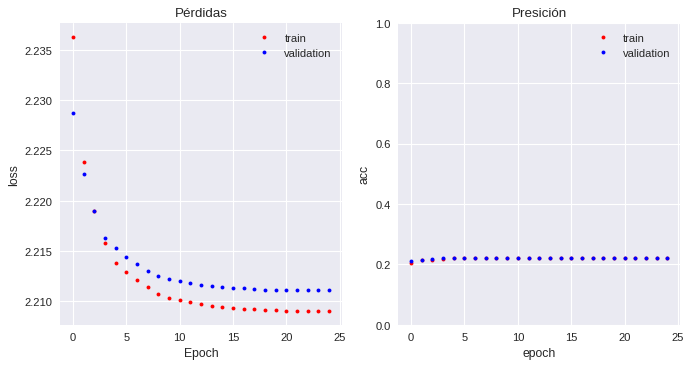

In [0]:
plt.figure(None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
plt.plot(history_d.history['loss'],'.r',label='train');
plt.plot(history_d.history['val_loss'],'.b',label='validation');
plt.ylabel('loss');
plt.xlabel('Epoch')
plt.title('Pérdidas');
plt.legend();

plt.subplot(1,2,2)
plt.ylabel('acc');
plt.title('Presición');
plt.xlabel('epoch');
plt.ylim((0,1))
plt.plot(history_d.history['acc'],'.r',label='train');
plt.plot(history_d.history['val_acc'],'.b',label='validation');
plt.legend();

Se aprecia en el gráfico que no se obtuvo un resultado siquiera deseable en el porcentaje de aciertos.

Este resultado no es extraño debido a que la red no presenta optimizadores de ningún tipo, por tanto es propensa a overfitting.

# **e)** Optimización de la CNN

Entrene la CNN definida en c) utilizando **RMSProp** durante 25 *epochs*. Elija la función de pérdida más apropiada para este problema. Construya finalmente un gráfico que muestre los errores de entrenamiento, validación y pruebas como función del número de *epochs*.  
*Hint: La curva sugiere algún cambio en el modelo definido, considere ésto en cuenta para las experimentaciones futuras.*
```python
from keras.optimizers import SGD, rmsprop
opt = rmsprop(lr=0.001, decay=1e-6)
model.compile( ... )
model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val, y_val),shuffle=True)
```


In [10]:

modele = Sequential()
modele.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:],W_regularizer=l2(0.01)))
modele.add(Activation('relu'))
modele.add(Dropout(0.25))
modele.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
modele.add(Conv2D(64, (3, 3), padding='same',W_regularizer=l2(0.01)))
modele.add(Activation('relu'))
modele.add(Dropout(0.25))
modele.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
modele.add(Flatten())
modele.add(Dense(512))
modele.add(Activation('relu'))
modele.add(Dropout(0.25))
modele.add(Dense(10))
modele.add(Activation('softmax'))
modele.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_6 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", input_shape=(32, 32, 3..., kernel_regularizer=<keras.reg...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", kernel_regularizer=<keras.reg...)`
  import sys


Se crea una red con optimizadores l2 en cada capa convolucional y con dropout de 0.25 para optimizar la red.

Debido a una falta de planificación solo se incluye el resultado final obtenido luego de probar diversas configuraciones de los parámetros de la red.

In [11]:
batch_size=32
epochs=25
  
opt = rmsprop(lr=0.001, decay=1e-6)
lrate = LearningRateScheduler(my_step_decay)

modele.compile(optimizer=opt,loss='categorical_crossentropy', metrics=["accuracy"])
history_e = modele.fit(x_train_norm, y_train_categ, batch_size=batch_size, epochs=epochs, validation_data=(x_val_norm,y_val_categ), shuffle=True, callbacks=[lrate])

Train on 30000 samples, validate on 12000 samples
Epoch 1/25
30000/30000 [==============================] - 19s 648us/step - loss: 1.7072 - acc: 0.4415 - val_loss: 1.5288 - val_acc: 0.5178
Epoch 2/25
30000/30000 [==============================] - 15s 486us/step - loss: 1.3079 - acc: 0.5736 - val_loss: 1.2664 - val_acc: 0.6014
Epoch 3/25
30000/30000 [==============================] - 15s 484us/step - loss: 1.1734 - acc: 0.6208 - val_loss: 1.3116 - val_acc: 0.5913
Epoch 4/25
30000/30000 [==============================] - 15s 485us/step - loss: 1.0808 - acc: 0.6583 - val_loss: 1.1048 - val_acc: 0.6525
Epoch 5/25
30000/30000 [==============================] - 14s 483us/step - loss: 0.9032 - acc: 0.7146 - val_loss: 1.1047 - val_acc: 0.6498
Epoch 6/25
30000/30000 [==============================] - 15s 485us/step - loss: 0.8577 - acc: 0.7310 - val_loss: 1.0848 - val_acc: 0.6573
Epoch 7/25
30000/30000 [==============================] - 15s 484us/step - loss: 0.8150 - acc: 0.7486 - val_loss: 1.

In [0]:
# Guardar y junto a x ya preprocesado
#with open('drive/history_e.pickle', 'wb') as f:
#  pickle.dump([history_e], f)

In [0]:
#Luego se vuelven a cargar las variables con:
#with open('drive/history_e.pickle','rb') as f:
#    history_e = pickle.load(f)[0]

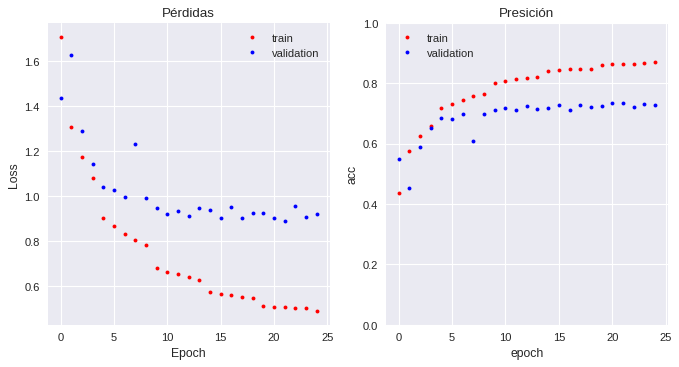

In [0]:
plt.figure(None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
plt.plot(history_e.history['loss'],'.r',label='train');
plt.plot(history_e.history['val_loss'],'.b',label='validation');
plt.ylabel('Loss');
plt.xlabel('Epoch');
plt.title('Pérdidas');
plt.legend();

plt.subplot(1,2,2)
plt.ylabel('acc');
plt.xlabel('epoch');
plt.title('Presición');
plt.plot(history_e.history['acc'],'.r',label='train');
plt.plot(history_e.history['val_acc'],'.b',label='validation');
plt.ylim((0,1))
plt.legend();

El resultado obtenido en este caso es bastante mejor que el obtenido en el punto anterior. Se concluye que con métodos para evitar overfitting se obtienen resultados bastante mejores, por lo que es necesario tenerlos presentes.

# **f)** Efecto de las dimensiones de las matrices de convolución en la CNN

Evalúe el efecto de modificar el tamaño de los filtros (de convolución) reportando la sensibilidad del error de pruebas a estos cambios en dos tipos de arquitecturas, una profunda y otra no. Presente un gráfico o tabla resumen. Por simplicidad entre durante sólo 15-20 *epochs*.
```python
"""Shallow network"""
nc = #convolutional filter size
model = Sequential()
model.add(Conv2D(64, (nc, nc), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
```


In [0]:
#shallow network
history_f_shallow=[];
for nc in range(2,10):
  modelf1 = Sequential()
  modelf1.add(Conv2D(64, (nc, nc), padding='same', input_shape=x_train.shape[1:]))
  modelf1.add(Activation('relu'))
  modelf1.add(MaxPooling2D(pool_size=(2, 2)))
  modelf1.add(Flatten())
  modelf1.add(Dense(512))
  modelf1.add(Activation('relu'))
  modelf1.add(Dense(10))
  modelf1.add(Activation('softmax'))
  batch_size=32
  epochs=15
  
  opt = SGD(lr=0.1, momentum=0.9, decay=0.1)
  modelf1.compile(optimizer=opt,loss='categorical_crossentropy', metrics=["accuracy"])
  history_f_shallow.append(modelf1.fit(x_train_norm, y_train_categ, epochs=epochs, batch_size=batch_size, validation_data=(x_val_norm,y_val_categ), shuffle=True))

Train on 30000 samples, validate on 12000 samples
Epoch 1/15
30000/30000 [==============================] - 13s 444us/step - loss: 1.8053 - acc: 0.3598 - val_loss: 1.6319 - val_acc: 0.4251
Epoch 2/15
30000/30000 [==============================] - 12s 413us/step - loss: 1.5846 - acc: 0.4434 - val_loss: 1.5590 - val_acc: 0.4476
Epoch 3/15
30000/30000 [==============================] - 12s 411us/step - loss: 1.5199 - acc: 0.4648 - val_loss: 1.5120 - val_acc: 0.4662
Epoch 4/15
30000/30000 [==============================] - 12s 411us/step - loss: 1.4791 - acc: 0.4816 - val_loss: 1.4895 - val_acc: 0.4717
Epoch 5/15
30000/30000 [==============================] - 12s 413us/step - loss: 1.4507 - acc: 0.4901 - val_loss: 1.4582 - val_acc: 0.4860
Epoch 6/15
30000/30000 [==============================] - 12s 413us/step - loss: 1.4280 - acc: 0.4984 - val_loss: 1.4399 - val_acc: 0.4905
Epoch 7/15
30000/30000 [==============================] - 12s 414us/step - loss: 1.4105 - acc: 0.5027 - val_loss: 1.

In [0]:
#deep
history_f_deep=[]
for nc in range(1,10):
  modelf2 = Sequential()
  modelf2.add(Conv2D(64, (nc, nc), padding='same', input_shape=x_train.shape[1:]))
  modelf2.add(Activation('relu'))
  modelf2.add(Dropout(0.1))
  modelf2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
  modelf2.add(Conv2D(64, (nc, nc), padding='same'))
  modelf2.add(Activation('relu'))
  modelf2.add(Dropout(0.1))
  modelf2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
  modelf2.add(Flatten())
  modelf2.add(Dense(512,activation='relu'))
  modelf2.add(Dropout(0.5))
  modelf2.add(Dense(10,activation='softmax'))
  batch_size=32
  epochs=15

  opt = SGD(lr=0.1, momentum=0.9, decay=0.1)

  modelf2.compile(optimizer=opt,loss='categorical_crossentropy', metrics=["accuracy"])
  history_f_deep.append(modelf2.fit(x_train_norm, y_train_categ, epochs=epochs, batch_size=batch_size, validation_data=(x_val_norm,y_val_categ), shuffle=True))

Train on 30000 samples, validate on 12000 samples
Epoch 1/15
30000/30000 [==============================] - 14s 482us/step - loss: 1.9849 - acc: 0.2760 - val_loss: 1.8578 - val_acc: 0.3630
Epoch 2/15
30000/30000 [==============================] - 14s 474us/step - loss: 1.8140 - acc: 0.3532 - val_loss: 1.7727 - val_acc: 0.3882
Epoch 3/15
30000/30000 [==============================] - 14s 474us/step - loss: 1.7439 - acc: 0.3780 - val_loss: 1.7206 - val_acc: 0.4145
Epoch 4/15
30000/30000 [==============================] - 14s 477us/step - loss: 1.7032 - acc: 0.3955 - val_loss: 1.6902 - val_acc: 0.4224
Epoch 5/15
30000/30000 [==============================] - 14s 477us/step - loss: 1.6716 - acc: 0.4069 - val_loss: 1.6760 - val_acc: 0.4232
Epoch 6/15
30000/30000 [==============================] - 15s 483us/step - loss: 1.6522 - acc: 0.4148 - val_loss: 1.6411 - val_acc: 0.4344
Epoch 7/15
30000/30000 [==============================] - 14s 477us/step - loss: 1.6349 - acc: 0.4195 - val_loss: 1.

In [0]:
# Guardar y junto a x ya preprocesado
#with open('drive/history_f.pickle', 'wb') as f:
#  pickle.dump([history_f_shallow,history_f_deep], f)

In [0]:
 
#Luego se vuelven a cargar las variables con:
#with open('drive/history_f.pickle','rb') as f:
#    history_f_shallow,history_f_deep = pickle.load(f)

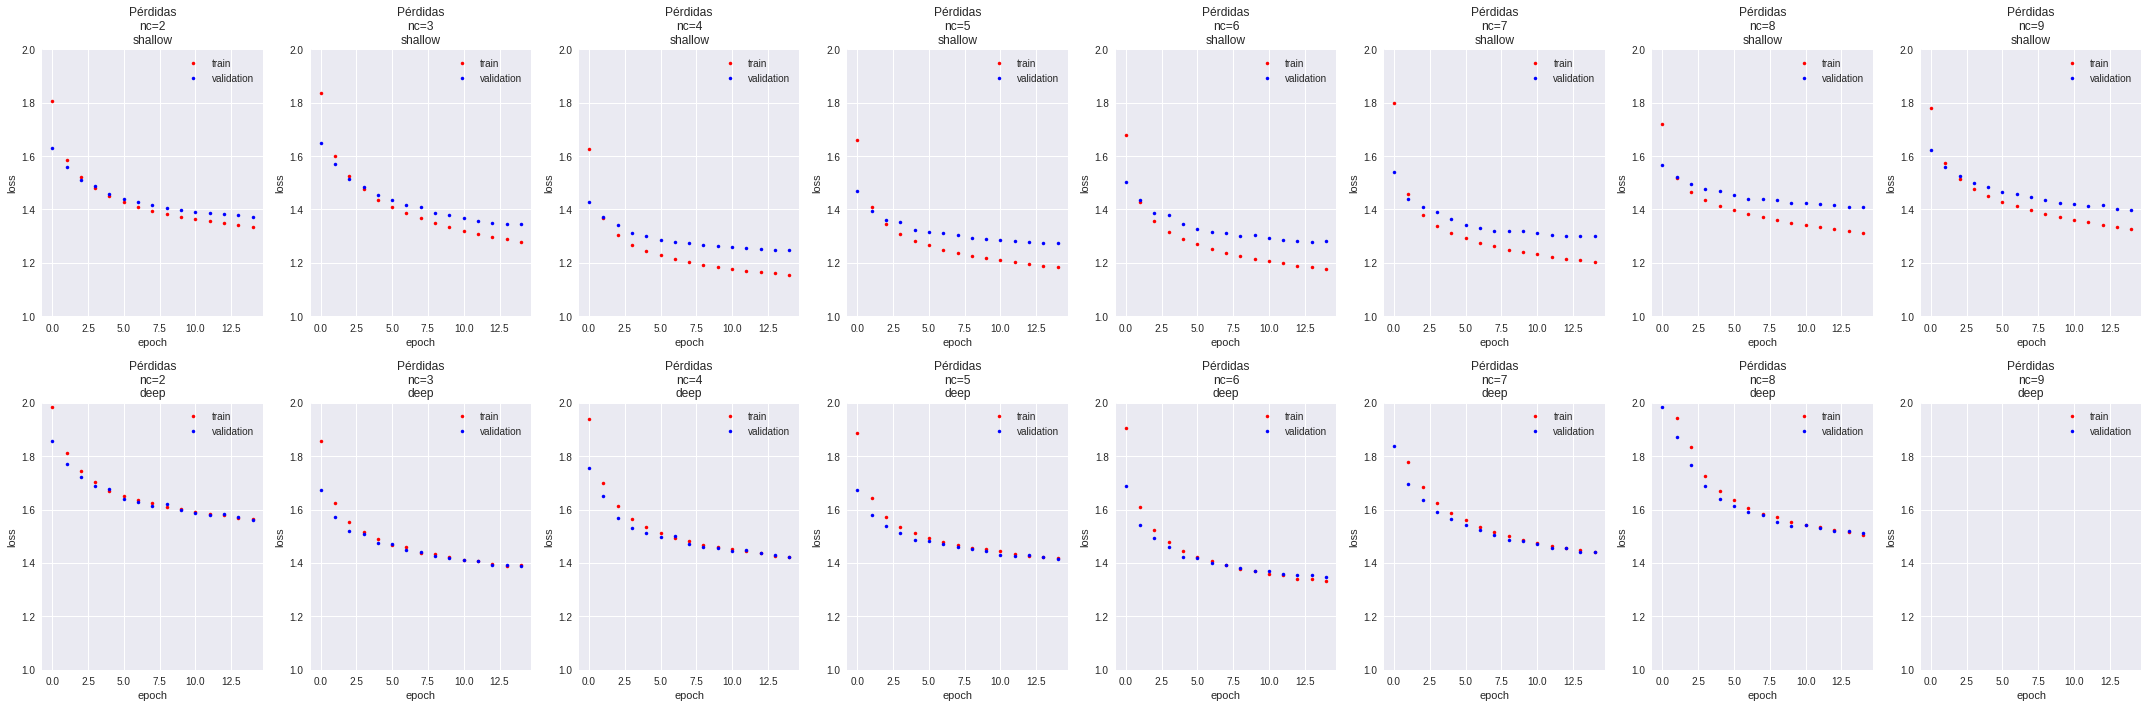

In [0]:
#plt.tight_layout()
plt.figure(figsize=(30,10))
for nc in range(2,10):
  
  plt.subplot(2,8,nc-1)
  #plt.title('conv_size=('nc+'x'+nc+')')
  plt.ylabel('loss');
  plt.xlabel('epoch');
  plt.plot(history_f_shallow[nc-2].history['loss'],'.r',label='train');
  plt.plot(history_f_shallow[nc-2].history['val_loss'],'.b',label='validation');
  plt.title('Pérdidas\nnc='+str(nc)+'\nshallow');
  plt.ylim([1,2])
  plt.legend();
  
  plt.subplot(2,8,nc-1+8)
  plt.ylabel('loss');
  plt.xlabel('epoch');
  plt.plot(history_f_deep[nc-2].history['loss'],'.r',label='train');
  plt.plot(history_f_deep[nc-2].history['val_loss'],'.b',label='validation');
  plt.title('Pérdidas\nnc='+str(nc)+'\ndeep');
  plt.ylim([1,2])
  plt.legend();

plt.tight_layout()

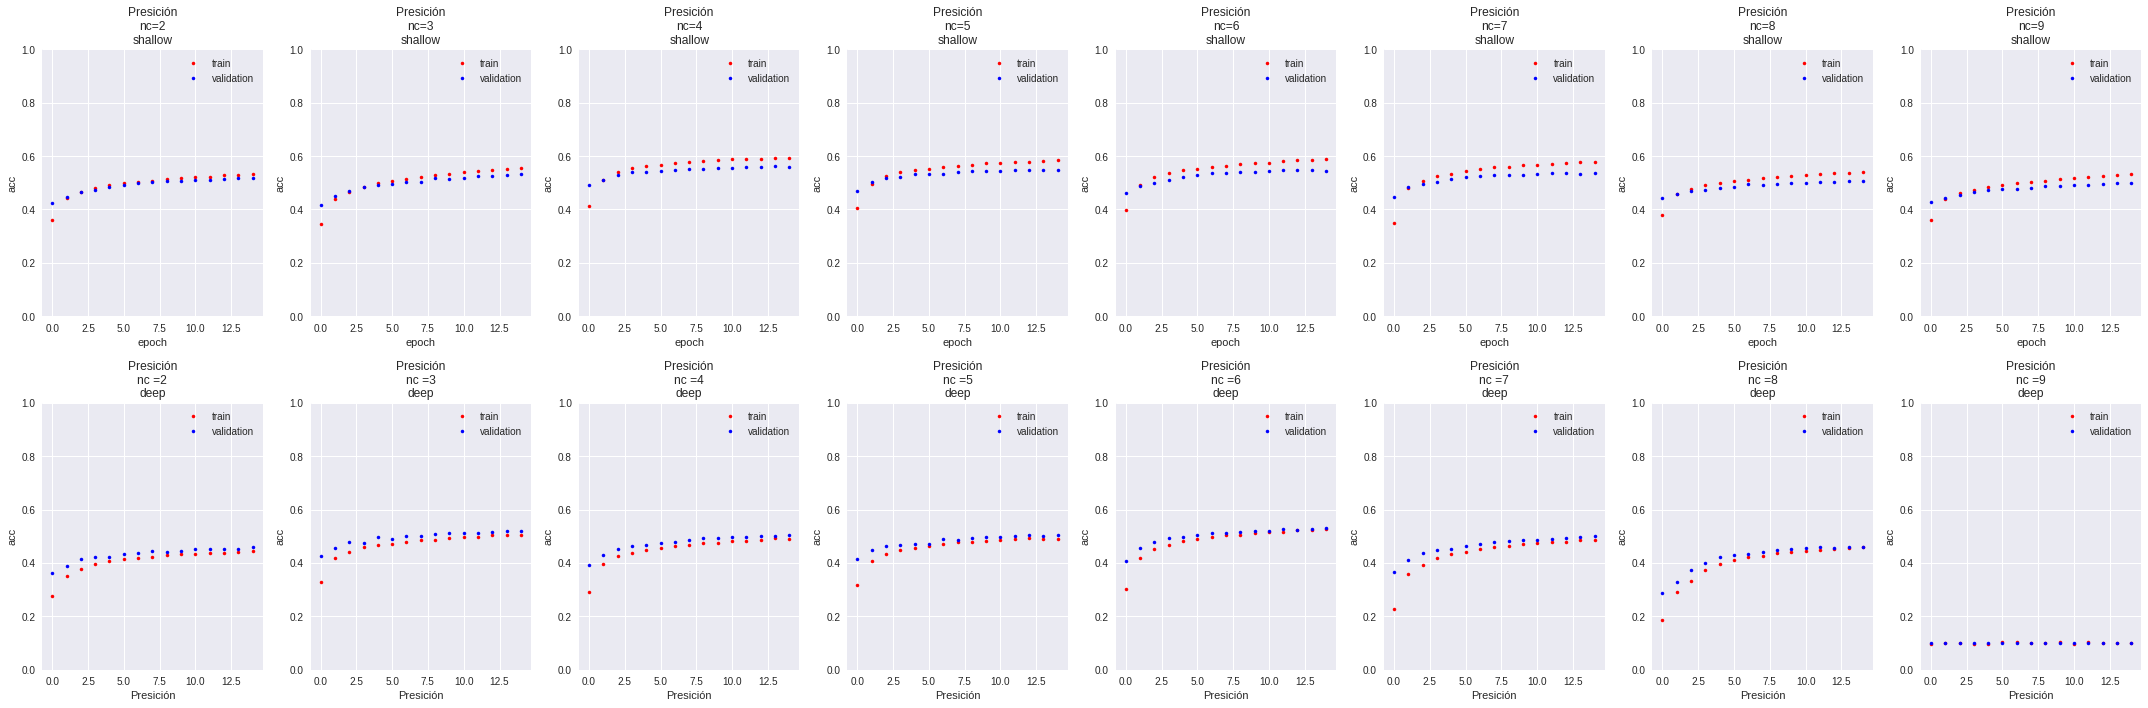

In [0]:
#plt.tight_layout()
plt.figure(figsize=(30,10))
for nc in range(2,10):
  
  plt.subplot(2,8,nc-1)
  #plt.title('conv_size=('nc+'x'+nc+')')
  plt.ylabel('acc');
  plt.xlabel('epoch');
  plt.plot(history_f_shallow[nc-2].history['acc'],'.r',label='train');
  plt.title('Presición\nnc='+str(nc)+'\nshallow');
  plt.plot(history_f_shallow[nc-2].history['val_acc'],'.b',label='validation');
  plt.ylim((0,1))
  plt.legend();
  
  plt.subplot(2,8,nc-1+8)
  plt.ylabel('acc');
  plt.xlabel('Presición');
  plt.title('Presición\nnc ='+str(nc)+'\ndeep');
  plt.plot(history_f_deep[nc-2].history['acc'],'.r',label='train');
  plt.plot(history_f_deep[nc-2].history['val_acc'],'.b',label='validation');
  plt.ylim((0,1))
  plt.legend();
plt.tight_layout()

Se aprecia que la red convolucional profunda (de solo dos capas) y la red no profunda tienen desempeños similares.

En el último caso, con nc = 9 en la red profunda no puede verse ninguna mejoría en el desempeño de la red. 

Se observa que el mejor desempeño es nc = 4 para la red poco profunda y nc = 6 para la red profunda.

Se observa que el desempeño en cada caso es inferior al 60%, por lo que no se llega a un mejor resultado que el obtenido anteriormente.

# **g)** Mantención v/s Disminución de las dimensiones de las matrices convolucionales

Se ha sugerido que la práctica bastante habitual de continuar una capa convolucional con una capa de *pooling* puede generar una reducción prematura de las dimensiones del patrón de entrada. Experimente con una arquitectura del tipo $C \times P \times C \times P \times F \times F$ versus  $C \times C \times P \times C \times C \times P \times F \times F$. Use 64 filtros para la primera capa convolucional y 128 para la segunda (o 64 filtros para las primeras 2 capas convolucionales y 128 para las dos últimas).  

> Reflexione sobre qué le parece más sensato: ¿qué estructura permite un mejor desempeño y/o extracción de atributos de interés?¿es aconsejable mantener el tamaño de los filtros usados anteriormente (pregunta anterior)? o ¿usar filtros más grandes en la segunda capa convolucional y más pequeños en la primera? o ¿usar filtros más pequeños en la segunda capa convolucional y más grandes en la primera?  
> **Hint:** con esta nueva arquitectura debiese superar el 70% de accuracy (de validación/test) antes de 5 epochs, pero la arquitectura es más sensible a overfitting por lo que podrı́a ser conveniente agregar un regularizador. Como resultado final de esta actividad gráfique los errores de entrenamiento, validación y pruebas como función del número de “epochs” (fijando el máximo en un número razonable como T = 25).
```python
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
```

No parece sensato aumentar el tama;

In [0]:
modelg1d = Sequential()
modelg1d.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
modelg1d.add(Activation('relu'))
modelg1d.add(Dropout(0.1))
modelg1d.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
modelg1d.add(Conv2D(128, (3, 3), padding='same',W_regularizer=l2(0.01)))
modelg1d.add(Activation('relu'))
modelg1d.add(Dropout(0.1))
modelg1d.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
modelg1d.add(Flatten())
modelg1d.add(Dense(512))
modelg1d.add(Activation('relu'))
modelg1d.add(Dropout(0.25))
modelg1d.add(Dense(10))
modelg1d.add(Activation('softmax'))
modelg1d.summary()

modelg2d = Sequential()
modelg2d.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
modelg2d.add(Activation('relu'))
modelg2d.add(Dropout(0.1))
modelg2d.add(Conv2D(128, (3, 3), padding='same',W_regularizer=l2(0.01)))
modelg2d.add(Activation('relu'))
modelg2d.add(Dropout(0.1))
modelg2d.add(MaxPooling2D(pool_size=(2, 2)))
modelg2d.add(Conv2D(64, (3, 3), padding='same',W_regularizer=l2(0.01)))
modelg2d.add(Activation('relu'))
modelg2d.add(Dropout(0.1))
modelg2d.add(Conv2D(128, (3, 3), padding='same',W_regularizer=l2(0.01)))
modelg2d.add(Activation('relu'))
modelg2d.add(Dropout(0.1))
modelg2d.add(MaxPooling2D(pool_size=(2, 2)))
modelg2d.add(Flatten())
modelg2d.add(Dense(512))
modelg2d.add(Activation('relu'))
modelg2d.add(Dropout(0.25))
modelg2d.add(Dense(10))
modelg2d.add(Activation('softmax'))
modelg2d.summary()

modelg3d= Sequential()
modelg3d.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
modelg3d.add(Activation('relu'))
modelg3d.add(Dropout(0.1))
modelg3d.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=l2(0.01)))
modelg3d.add(Activation('relu'))
modelg3d.add(Dropout(0.1))
modelg3d.add(MaxPooling2D(pool_size=(2, 2)))
modelg3d.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=l2(0.01)))
modelg3d.add(Activation('relu'))
modelg3d.add(Dropout(0.1))
modelg3d.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=l2(0.01)))
modelg3d.add(Activation('relu'))
modelg3d.add(Dropout(0.1))
modelg3d.add(MaxPooling2D(pool_size=(2, 2)))
modelg3d.add(Flatten())
modelg3d.add(Dense(512))
modelg3d.add(Activation('relu'))
modelg3d.add(Dropout(0.25))
modelg3d.add(Dense(10))
modelg3d.add(Activation('softmax'))
modelg3d.summary()

modelg4d= Sequential()
modelg4d.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
modelg4d.add(Activation('relu'))
modelg4d.add(Dropout(0.1))
modelg4d.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=l2(0.01)))
modelg4d.add(Activation('relu'))
modelg4d.add(Dropout(0.1))
modelg4d.add(MaxPooling2D(pool_size=(2, 2)))
modelg4d.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=l2(0.01)))
modelg4d.add(Activation('relu'))
modelg4d.add(Dropout(0.1))
modelg4d.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=l2(0.01)))
modelg4d.add(Activation('relu'))
modelg4d.add(Dropout(0.1))
modelg4d.add(MaxPooling2D(pool_size=(2, 2)))
modelg4d.add(Flatten())
modelg4d.add(Dense(512))
modelg4d.add(Activation('relu'))
modelg4d.add(Dropout(0.25))
modelg4d.add(Dense(10))
modelg4d.add(Activation('softmax'))
modelg4d.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same", kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", kernel_regularizer=<keras.reg...)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_54 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
activation_55 (Activation)   (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 16, 16, 128)       0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same", kernel_regularizer=<keras.reg...)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_58 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_59 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 16, 16, 128)       0         
__________

In [0]:
epochs=25

opt = rmsprop(lr=0.001, decay=1e-6)
lrate = LearningRateScheduler(my_step_decay)

modelg1d.compile(optimizer=opt,loss='categorical_crossentropy', metrics=["accuracy"])
modelg2d.compile(optimizer=opt,loss='categorical_crossentropy', metrics=["accuracy"])
modelg3d.compile(optimizer=opt,loss='categorical_crossentropy', metrics=["accuracy"])
modelg4d.compile(optimizer=opt,loss='categorical_crossentropy', metrics=["accuracy"])

history_g1d = modelg1d.fit(x_train_norm, y_train_categ, batch_size=batch_size, epochs=epochs, validation_data=(x_val_norm,y_val_categ), shuffle=True, callbacks=[lrate])
history_g2d = modelg2d.fit(x_train_norm, y_train_categ, batch_size=batch_size, epochs=epochs, validation_data=(x_val_norm,y_val_categ), shuffle=True, callbacks=[lrate])
history_g3d = modelg3d.fit(x_train_norm, y_train_categ, batch_size=batch_size, epochs=epochs, validation_data=(x_val_norm,y_val_categ), shuffle=True, callbacks=[lrate])
history_g4d = modelg4d.fit(x_train_norm, y_train_categ, batch_size=batch_size, epochs=epochs, validation_data=(x_val_norm,y_val_categ), shuffle=True, callbacks=[lrate])

Train on 30000 samples, validate on 12000 samples
Epoch 1/25
30000/30000 [==============================] - 23s 760us/step - loss: 1.6515 - acc: 0.4440 - val_loss: 1.3774 - val_acc: 0.5479
Epoch 2/25
30000/30000 [==============================] - 20s 667us/step - loss: 1.2546 - acc: 0.5845 - val_loss: 1.4439 - val_acc: 0.5165
Epoch 3/25
30000/30000 [==============================] - 20s 660us/step - loss: 1.1126 - acc: 0.6365 - val_loss: 1.3635 - val_acc: 0.5535
Epoch 4/25
30000/30000 [==============================] - 20s 656us/step - loss: 1.0167 - acc: 0.6718 - val_loss: 1.1324 - val_acc: 0.6283
Epoch 5/25
30000/30000 [==============================] - 19s 648us/step - loss: 0.8314 - acc: 0.7351 - val_loss: 0.9788 - val_acc: 0.6859
Epoch 6/25
30000/30000 [==============================] - 19s 633us/step - loss: 0.7818 - acc: 0.7557 - val_loss: 1.0251 - val_acc: 0.6719
Epoch 7/25
30000/30000 [==============================] - 19s 625us/step - loss: 0.7398 - acc: 0.7695 - val_loss: 0.

In [0]:
# Guardar y junto a x ya preprocesado
#with open('drive/history_g.pickle', 'wb') as f:
 # pickle.dump([history_g1d,history_g2d,history_g3d,history_g4d], f)

In [0]:
#Luego se vuelven a cargar las variables con:
#with open('drive/history_g.pickle','rb') as f:
 #   history_g1d,history_g2d,history_g3d,history_g4d = pickle.load(f)

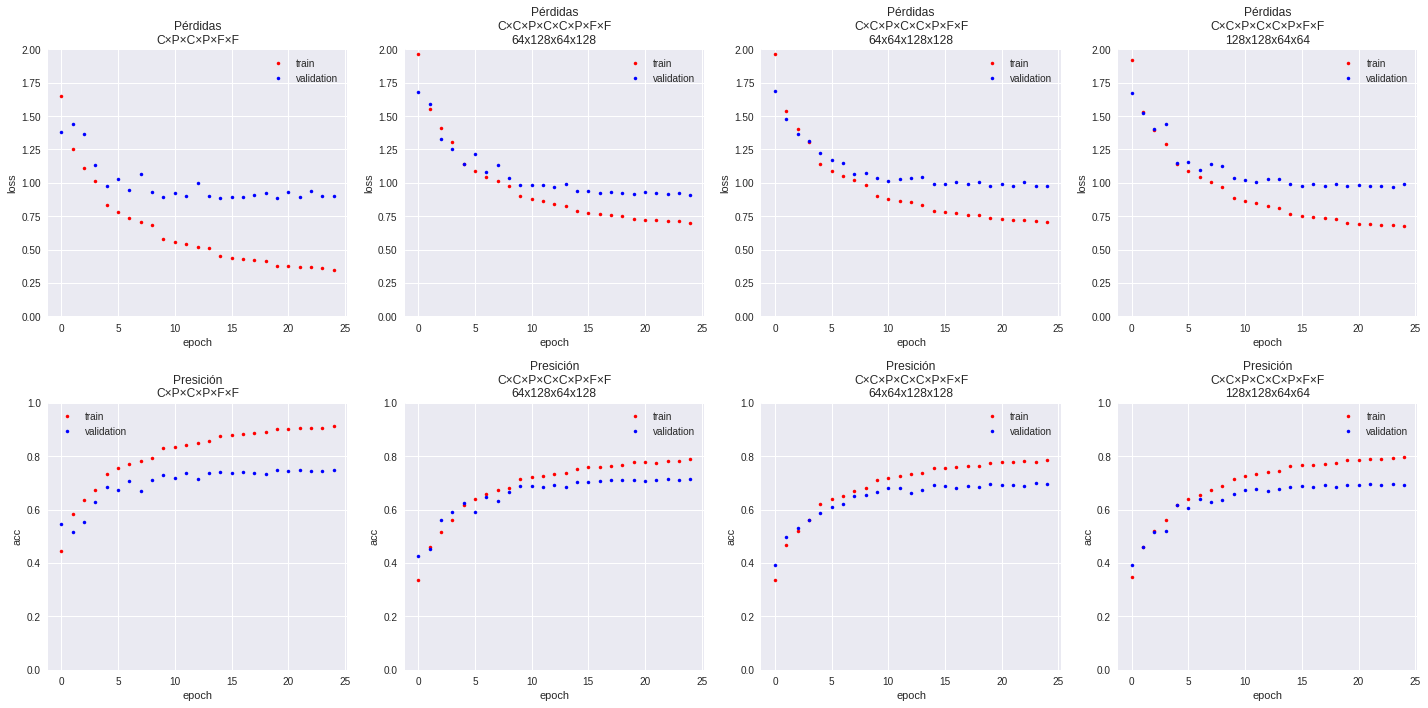

In [0]:
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
plt.ylabel('loss');
plt.xlabel('epoch');
plt.plot(history_g1d.history['loss'],'.r',label='train');
plt.plot(history_g1d.history['val_loss'],'.b',label='validation');
plt.title('Pérdidas\nC×P×C×P×F×F');
plt.legend();
plt.ylim((0,2))

plt.subplot(2,4,2)
plt.ylabel('loss');
plt.xlabel('epoch');
plt.plot(history_g2d.history['loss'],'.r',label='train');
plt.plot(history_g2d.history['val_loss'],'.b',label='validation');
plt.title('Pérdidas\nC×C×P×C×C×P×F×F\n64x128x64x128');
plt.legend();
plt.ylim((0,2))

plt.subplot(2,4,3)
plt.ylabel('loss');
plt.xlabel('epoch');
plt.plot(history_g3d.history['loss'],'.r',label='train');
plt.plot(history_g3d.history['val_loss'],'.b',label='validation');
plt.title('Pérdidas\nC×C×P×C×C×P×F×F\n64x64x128x128');
plt.legend();
plt.ylim((0,2))

plt.subplot(2,4,4)
plt.ylabel('loss');
plt.xlabel('epoch');
plt.plot(history_g4d.history['loss'],'.r',label='train');
plt.plot(history_g4d.history['val_loss'],'.b',label='validation');
plt.title('Pérdidas\nC×C×P×C×C×P×F×F\n128x128x64x64');
plt.legend();
plt.ylim((0,2))

plt.subplot(2,4,5)
plt.ylabel('acc');
plt.xlabel('epoch');
plt.plot(history_g1d.history['acc'],'.r',label='train');
plt.plot(history_g1d.history['val_acc'],'.b',label='validation');
plt.title('Presición\nC×P×C×P×F×F');
plt.ylim((0,1))
plt.legend();

plt.subplot(2,4,6)
plt.ylabel('acc');
plt.xlabel('epoch');
plt.plot(history_g2d.history['acc'],'.r',label='train');
plt.plot(history_g2d.history['val_acc'],'.b',label='validation');
plt.title('Presición\nC×C×P×C×C×P×F×F\n64x128x64x128');
plt.ylim((0,1))
plt.legend();

plt.subplot(2,4,7)
plt.ylabel('acc');
plt.xlabel('epoch');
plt.plot(history_g3d.history['acc'],'.r',label='train');
plt.plot(history_g3d.history['val_acc'],'.b',label='validation');
plt.title('Presición\nC×C×P×C×C×P×F×F\n64x64x128x128');
plt.ylim((0,1))
plt.legend();

plt.subplot(2,4,8)
plt.ylabel('acc');
plt.xlabel('epoch');
plt.plot(history_g4d.history['acc'],'.r',label='train');
plt.plot(history_g4d.history['val_acc'],'.b',label='validation');
plt.title('Presición\nC×C×P×C×C×P×F×F\n128x128x64x64');
plt.ylim((0,1))
plt.legend();


plt.tight_layout()
 

Se observa que la cantidad de aciertos  para las últimas dos configuraciones es parecida, lo que se aleja de las predicciones hechas por nosotros donde esperabamos que una rebase a la otra (no pudimos ponernos de a cuerdo con cuál debia ser mejor).
Se observa que el resultado de la red con reducción inmediata es mejor que cualquier resultado de una red que mantiene su dimensión antes da bajarla.

Los resultados obtenidos demuestran que el desempeño de la red al reducir las dimensiones es bastante mejor, lo que calza con una idea jerárquica de cómo debe trabajar una convolución tras otra.

# **h)** Pooling v/s Capa convolucional

Algunos investigadores, han propuesto que las capas de *pooling* se pueden reemplazar por capas convoluciones con stride 2. ¿Se reduce dimensionalidad de este modo? Compruébelo verificando los cambios de forma (dimensionalidad) que experimenta un patrón de entrada a medida que se ejecuta un *forward-pass*.  
Entrene la red resultante con el método que prefiera, gráficando los errores de entrenamiento, validación y pruebas como función del número de “epochs” (fijando el máximo en un número razonable como T = 25).
```python
...
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
...
```

In [0]:
modelh2 = Sequential()
modelh2.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:],kernel_regularizer=l2(0.01)))
modelh2.add(Activation('relu'))
modelh2.add(Dropout(0.25))
modelh2.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=l2(0.01)))
modelh2.add(Activation('relu'))
modelh2.add(Dropout(0.25))
modelh2.add(Conv2D(64, (3, 3), strides=(2, 2),kernel_regularizer=l2(0.01)))
modelh2.add(Activation('relu'))
modelh2.add(Conv2D(64, (3, 3), padding='same'))
modelh2.add(Activation('relu'))
modelh2.add(Dropout(0.25))
modelh2.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=l2(0.01)))
modelh2.add(Activation('relu'))
modelh2.add(Dropout(0.25))
modelh2.add(Conv2D(64, (3, 3), strides=(2, 2), kernel_regularizer=l2(0.01)))
modelh2.add(Activation('relu'))
modelh2.add(Flatten())
modelh2.add(Dense(512))
modelh2.add(Activation('relu'))
modelh2.add(Dropout(0.25))
modelh2.add(Dense(10))
modelh2.add(Activation('softmax'))
modelh2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        73792     
__________

In [0]:
batch_size=32
epochs=20

opt = rmsprop(lr=0.001, decay=1e-6)
lrate = LearningRateScheduler(my_step_decay)

#modelh1.compile(optimizer=opt,loss='categorical_crossentropy')
modelh2.compile(optimizer=opt,loss='categorical_crossentropy', metrics=["accuracy"])

#historyh1 = modelh1.fit(x_train_norm, y_train_categ, batch_size=batch_size, epochs=epochs, validation_data=(x_val_norm,y_val_categ), shuffle=True, callbacks=[lrate])
historyh2 = modelh2.fit(x_train_norm, y_train_categ, batch_size=batch_size, epochs=epochs, validation_data=(x_val_norm,y_val_categ), shuffle=True, callbacks=[lrate])

Train on 30000 samples, validate on 12000 samples
Epoch 1/20
30000/30000 [==============================] - 37s 1ms/step - loss: 3.9522 - acc: 0.3985 - val_loss: 1.3183 - val_acc: 0.5655
Epoch 2/20
30000/30000 [==============================] - 36s 1ms/step - loss: 1.2751 - acc: 0.5903 - val_loss: 1.3504 - val_acc: 0.5706
Epoch 3/20
30000/30000 [==============================] - 36s 1ms/step - loss: 1.2336 - acc: 0.6080 - val_loss: 1.3250 - val_acc: 0.5632
Epoch 4/20
30000/30000 [==============================] - 36s 1ms/step - loss: 1.2011 - acc: 0.6208 - val_loss: 1.7663 - val_acc: 0.5013
Epoch 5/20
30000/30000 [==============================] - 36s 1ms/step - loss: 1.0191 - acc: 0.6771 - val_loss: 1.0225 - val_acc: 0.6816
Epoch 6/20
30000/30000 [==============================] - 36s 1ms/step - loss: 0.9739 - acc: 0.6897 - val_loss: 1.0778 - val_acc: 0.6623
Epoch 7/20
30000/30000 [==============================] - 36s 1ms/step - loss: 0.9579 - acc: 0.6932 - val_loss: 0.9831 - val_acc

In [0]:
# Guardar y junto a x ya preprocesado
#with open('drive/history_h.pickle', 'wb') as f:
 # pickle.dump([historyh1,historyh2], f)

In [0]:
#Luego se vuelven a cargar las variables con:
#with open('drive/history_h.pickle','rb') as f:
 # historyh1,historyh2 = pickle.load(f)

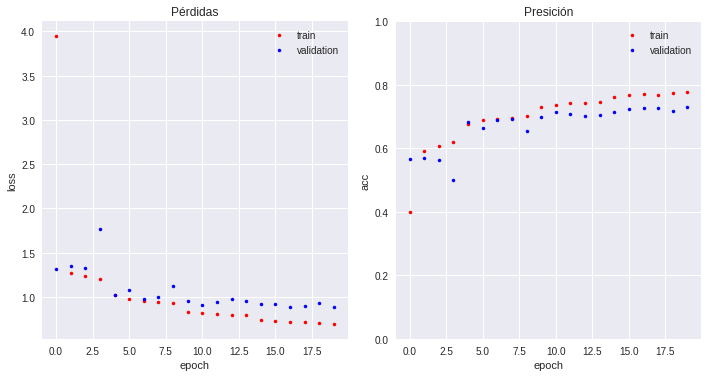

In [0]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.ylabel('loss');
plt.xlabel('epoch');
plt.plot(historyh2.history['loss'],'.r',label='train');
plt.plot(historyh2.history['val_loss'],'.b',label='validation');
plt.title('Pérdidas');
plt.legend();

plt.subplot(2,2,2)
plt.ylabel('acc');
plt.xlabel('epoch');
plt.plot(historyh2.history['acc'],'.r',label='train');
plt.plot(historyh2.history['val_acc'],'.b',label='validation');
plt.ylim((0,1))
plt.title('Presición');
plt.legend();
 
plt.tight_layout()

Al reemplazar la capa de pooling por una convolucional sin padding, se obtiene un resultado bastante similar al obtenido en la red optimizada, pero con tiempos de entrenamiento mas largos. 

Se observa además que no se estabiliza el progreso de la red en 20 Epoch, por tanto es posible que de haber seguido entrenando se hubiese encontrado un mejor resultado.

Con respecto a la dimensionalidad no se nota diferencia alguna.

# **i)** Ampliación del dataframe

Una forma interesante de regularizar modelos entrenados para visión artificial consiste en “aumentar” el número de ejemplos de entrenamiento usando transformaciones sencillas como: rotaciones, corrimientos y reflexiones, tanto horizontales como verticales. Explique por qué este procedimiento podrı́a ayudar a mejorar el modelo y el por qué las etiquetas no cambian al aplicar estas operaciones. Evalúe experimentalmente la conveniencia de incorporarlo.
```python
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=0, # randomly rotate images (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of height)
    horizontal_flip=True, # randomly flip images
    vertical_flip=False) # randomly flip images
datagen.fit(x_train)
model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),steps_per_epoch=x_train.shape[0]// batch_size, epochs=epochs,validation_data=(x_test, y_test))
```

In [0]:

modeli = Sequential()
modeli.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:],W_regularizer=l2(0.01)))
modeli.add(Activation('relu'))
modeli.add(Dropout(0.25))
modeli.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
modeli.add(Conv2D(64, (3, 3), padding='same',W_regularizer=l2(0.01)))
modeli.add(Activation('relu'))
modeli.add(Dropout(0.25))
modeli.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
modeli.add(Flatten())
modeli.add(Dense(512))
modeli.add(Activation('relu'))
modeli.add(Dropout(0.25))
modeli.add(Dense(10))
modeli.add(Activation('softmax'))
modeli.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_10 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 64)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", input_shape=(32, 32, 3..., kernel_regularizer=<keras.reg...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", kernel_regularizer=<keras.reg...)`
  import sys


In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=0, # randomly rotate images (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of height)
    horizontal_flip=True, # randomly flip images
    vertical_flip=True) # randomly flip images
datagen.fit(x_train_norm)
modeli.compile(optimizer=opt,loss='categorical_crossentropy', metrics=["accuracy"])
historyi=modeli.fit_generator(datagen.flow(x_train_norm, y_train_categ,batch_size=batch_size),steps_per_epoch=x_train.shape[0]//batch_size, epochs=epochs,validation_data=(x_test_norm, y_test_categ))

Epoch 1/15
937/937 [==============================] - 25s 26ms/step - loss: 7.8483 - acc: 0.1853 - val_loss: 1.8108 - val_acc: 0.3711
Epoch 2/15
937/937 [==============================] - 23s 25ms/step - loss: 1.7596 - acc: 0.3710 - val_loss: 1.6249 - val_acc: 0.4436
Epoch 3/15
937/937 [==============================] - 24s 25ms/step - loss: 1.6031 - acc: 0.4336 - val_loss: 1.5119 - val_acc: 0.4957
Epoch 4/15
937/937 [==============================] - 24s 26ms/step - loss: 1.4978 - acc: 0.4761 - val_loss: 1.4339 - val_acc: 0.5175
Epoch 5/15
937/937 [==============================] - 25s 26ms/step - loss: 1.4215 - acc: 0.5026 - val_loss: 1.4535 - val_acc: 0.5056
Epoch 6/15
937/937 [==============================] - 25s 26ms/step - loss: 1.3656 - acc: 0.5316 - val_loss: 1.3098 - val_acc: 0.5679
Epoch 7/15
937/937 [==============================] - 24s 26ms/step - loss: 1.3287 - acc: 0.5414 - val_loss: 1.2390 - val_acc: 0.5848
Epoch 8/15
937/937 [==============================] - 24s 26ms

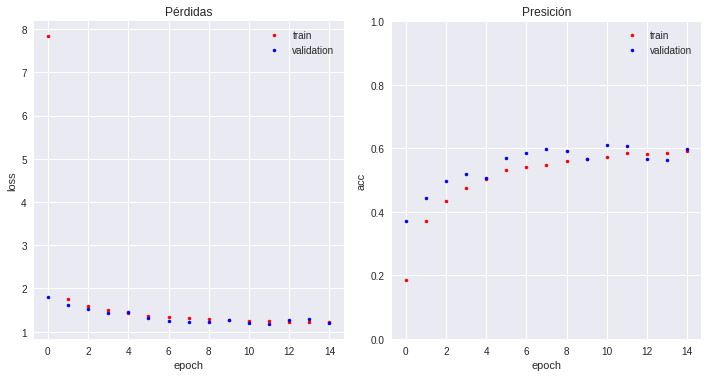

In [0]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.ylabel('loss');
plt.xlabel('epoch');
plt.plot(historyi.history['loss'],'.r',label='train');
plt.plot(historyi.history['val_loss'],'.b',label='validation');
plt.title('Pérdidas');
plt.legend();

plt.subplot(2,2,2)
plt.ylabel('acc');
plt.xlabel('epoch');
plt.plot(historyi.history['acc'],'.r',label='train');
plt.plot(historyi.history['val_acc'],'.b',label='validation');
plt.title('Presición');
plt.ylim((0,1))
plt.legend();
 
plt.tight_layout()

Al ampliar el dataframe de esta forma se considera en el entrenamiento un aspecto en que las redes neuronales pierden caacidad de predicción, las transformaciones de similaridad. En este punto se esperaba obtener un mejor resultado. Posiblemente debido a la baja resolución de las imágenes , no se nota una mejora sustancial en la capacidad de predicción de la red, aún cuando la teoría sugiere que el sistema debiese ganar robustez.

# **j)** Pre-procesamiento del dataframe - Key Points

Para una comparación del desempeño de la red neuronal, pre-procese el dataset de CIFAR-10 y calcule los descriptores manuales SIFT, para un mejor entendimiento de éstos consulte:  https://ianlondon.github.io/blog/how-to-sift-opencv/ y https://docs.opencv.org/3.4.3/da/df5/tutorial_py_sift_intro.html. Como se genera un descriptor de 128 dimensiones para cada *keypoint* comprima esta información de alguna manera, comente sobre la operación.

> Es necesario instalar *OpenCV* para realizar el cálculo de este descriptor.  
```python
!pip install opencv-python==3.1 opencv-contrib-python==3.4.2.16
```
  

>```python
import cv2
def pre_process(img):
    if np.max(img) <= 1:
        img*=255
    img = img.astype("uint8")
    img_gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img_gray
def calculate_sift(cifar):
    sift_cifar = []
    for image in cifar:
      img_gray = pre_process(image)
      sift = cv2.xfeatures2d.SIFT_create()
      kp, desc = sift.detectAndCompute(img_gray, None)
      if type(desc) == type(None):
        desc = np.zeros((1,128))
      compress_desc = np.mean(desc,axis=0) #compress all keypoints
      sift_cifar.append(compress_desc)
    return np.asarray(sift_cifar)
cifar_sift = calculate_sift(X)
```
*Recuerde escalar los datos antes de entregárselos al modelo*

> **j.1)** Visualice los *keypoint* para una mejor comprensión visual de lo que son los descriptores manuales en alguna imagen aleatoria.
```python
sample_image = X[sample_index]
gray_sample_image = pre_process(sample_image)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray_sample_image, None)
"""draw and plot"""
img=cv2.drawKeypoints(gray_sample_image,kp,sample_image)
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()
```

> Entrene una red neuronal densa (la misma que sigue a las capas convoluciones definidas en los modelos previos), compare el desempeño de la red con el modelo más básico (o de peor desempeño) y el modelo de mejor desempeño obtenido hasta este punto. Comente sobre el entrenamiento (error y tiempos de ejecución) y resultados.


In [0]:
!pip install opencv-python==3.1.0.4 opencv-contrib-python==3.4.2.16

In [0]:
import cv2

In [0]:
import cv2
def pre_process(img):
    if np.max(img) <= 1:
        img*=255
    img = img.astype("uint8")
    img_gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img_gray
def calculate_sift(cifar):
    sift_cifar = []
    for image in cifar:
      img_gray = pre_process(image)
      sift = cv2.xfeatures2d.SIFT_create()
      kp, desc = sift.detectAndCompute(img_gray, None)
      if type(desc) == type(None):
        desc = np.zeros((1,128))
      compress_desc = np.mean(desc,axis=0) #compress all keypoints
      sift_cifar.append(compress_desc)
    return np.asarray(sift_cifar)

In [0]:
cifar_sift_train = calculate_sift(x_train_norm)
cifar_sift_test  = calculate_sift(x_test_norm)
cifar_sift_val  = calculate_sift(x_val_norm)

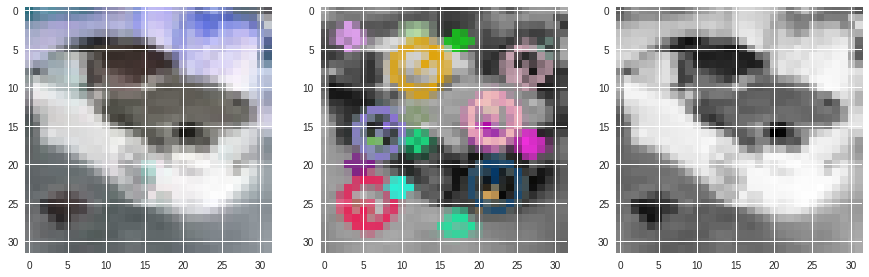

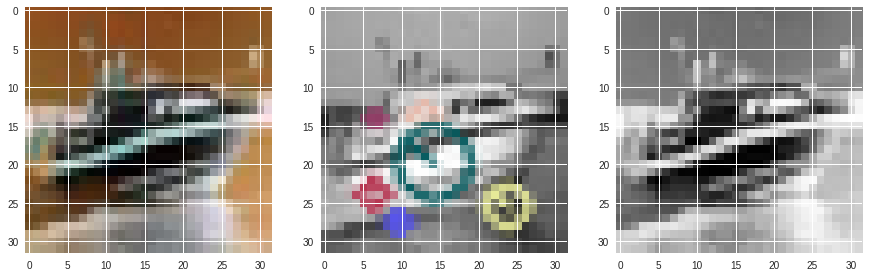

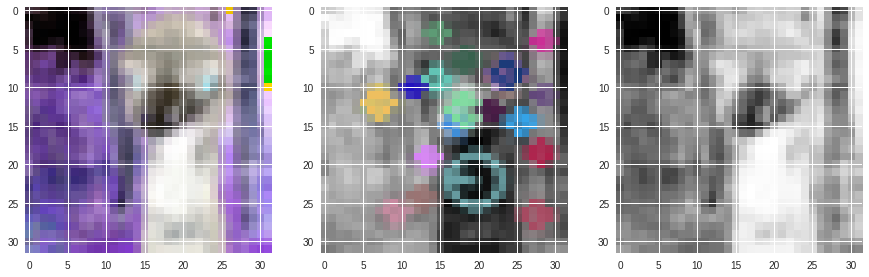

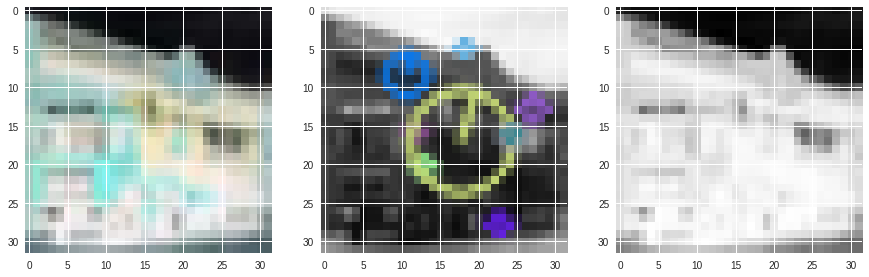

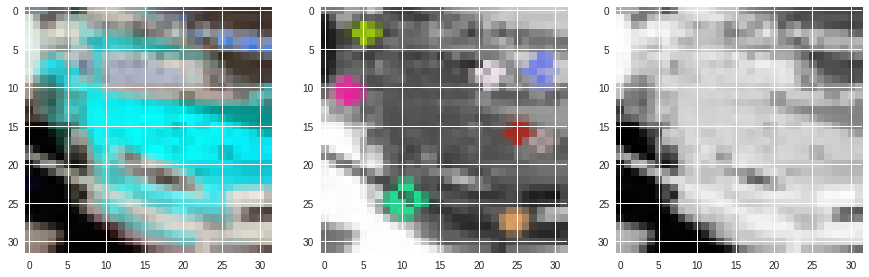

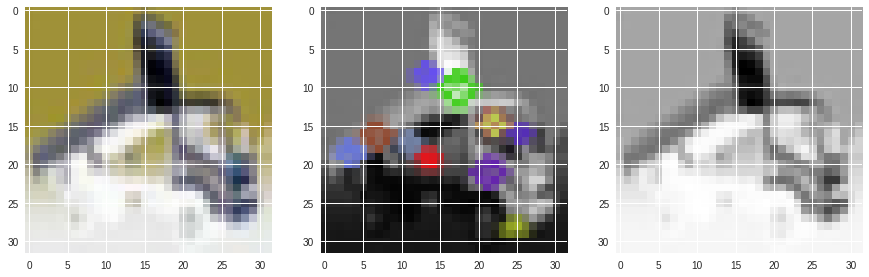

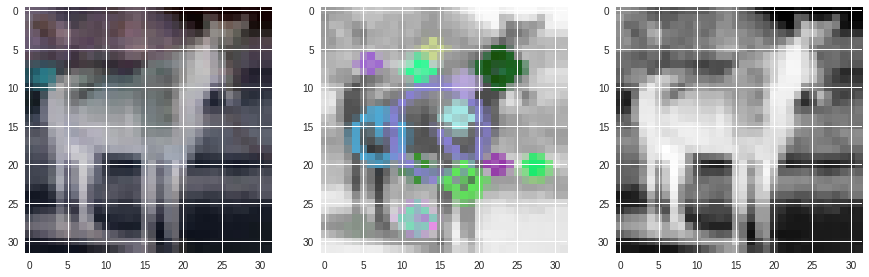

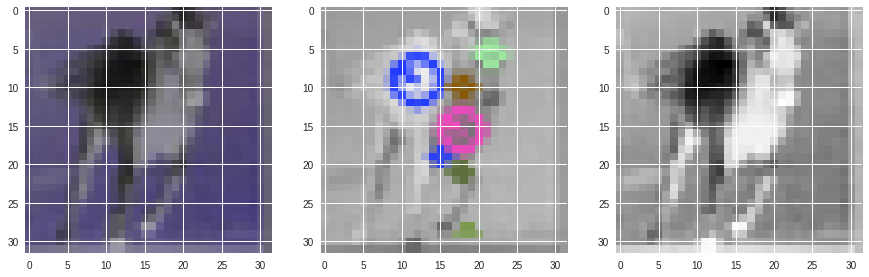

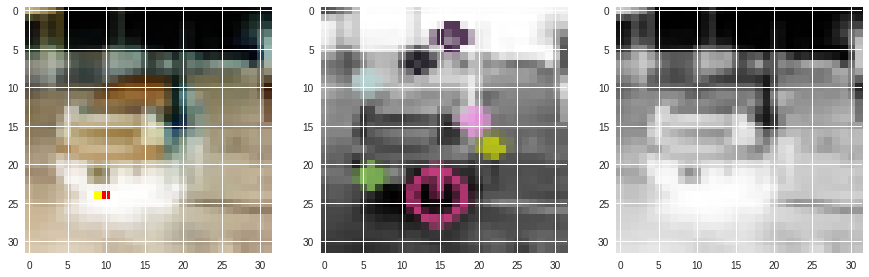

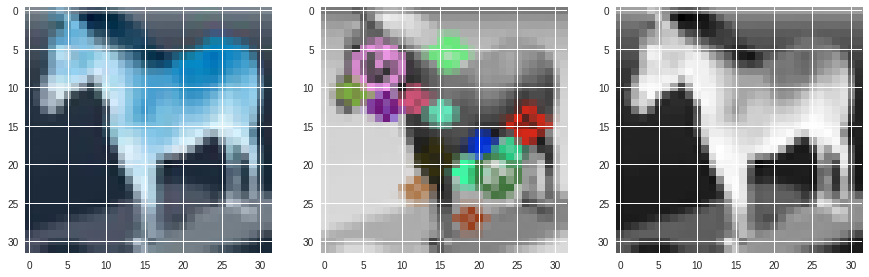

In [0]:
for i in range(10):
  i = int(random.random()*len(x_train_norm))
  a_sample_image = x_train_norm[i]
  a_sample_cifar_image = cifar_sift_train[i]
  a_gray_sample_image = pre_process(a_sample_image)
  sift = cv2.xfeatures2d.SIFT_create()
  kp = sift.detect(a_gray_sample_image, None)
  """draw and plot"""
  new_img=cv2.drawKeypoints(a_gray_sample_image,kp,a_sample_cifar_image,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  plt.figure(figsize=(15,10))
  plt.subplot(1,3,1)
  plt.imshow(a_sample_image)
  plt.subplot(1,3,2)
  plt.imshow(new_img)
  plt.subplot(1,3,3)
  plt.imshow(a_gray_sample_image)

In [0]:
modelj = Sequential()
modelj.add(Dense(512,input_shape=cifar_sift_train.shape[1:]))
modelj.add(Activation('relu'))
modelj.add(Dropout(0.25))
modelj.add(Dense(10))
modelj.add(Activation('softmax'))
modelj.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               66048     
_________________________________________________________________
activation_15 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_16 (Activation)   (None, 10)                0         
Total params: 71,178
Trainable params: 71,178
Non-trainable params: 0
_________________________________________________________________


In [0]:
modelj.compile(optimizer=opt,loss='categorical_crossentropy', metrics=["accuracy"])
historyj = modelj.fit(cifar_sift_train, y_train_categ, batch_size=batch_size, epochs=epochs, validation_data=(cifar_sift_val,y_val_categ), shuffle=True, callbacks=[lrate])

Train on 30000 samples, validate on 12000 samples
Epoch 1/20
30000/30000 [==============================] - 6s 185us/step - loss: 14.4842 - acc: 0.1003 - val_loss: 14.5040 - val_acc: 0.0994
Epoch 2/20
30000/30000 [==============================] - 5s 166us/step - loss: 14.4827 - acc: 0.1006 - val_loss: 14.5037 - val_acc: 0.0994
Epoch 3/20
30000/30000 [==============================] - 5s 165us/step - loss: 14.4820 - acc: 0.1006 - val_loss: 14.5038 - val_acc: 0.0994
Epoch 4/20
30000/30000 [==============================] - 5s 164us/step - loss: 14.4825 - acc: 0.1006 - val_loss: 14.5039 - val_acc: 0.0994
Epoch 5/20
30000/30000 [==============================] - 5s 162us/step - loss: 14.4824 - acc: 0.1006 - val_loss: 14.5040 - val_acc: 0.0994
Epoch 6/20
30000/30000 [==============================] - 5s 162us/step - loss: 14.4825 - acc: 0.1006 - val_loss: 14.5040 - val_acc: 0.0994
Epoch 7/20
30000/30000 [==============================] - 5s 161us/step - loss: 14.4825 - acc: 0.1006 - val_lo

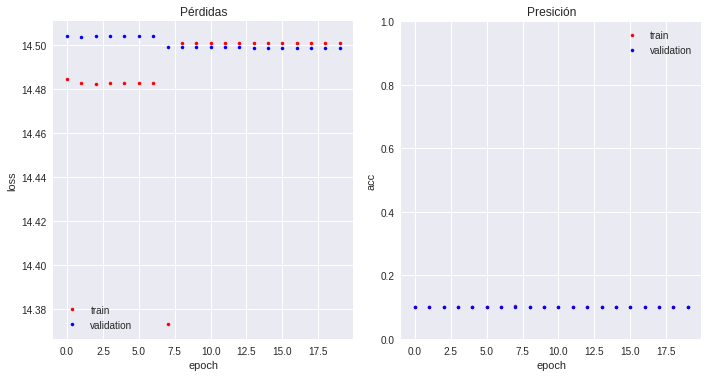

In [0]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.ylabel('loss');
plt.xlabel('epoch');
plt.plot(historyj.history['loss'],'.r',label='train');
plt.plot(historyj.history['val_loss'],'.b',label='validation');
plt.title('Pérdidas');
plt.legend();

plt.subplot(2,2,2)
plt.ylabel('acc');
plt.xlabel('epoch');
plt.plot(historyj.history['acc'],'.r',label='train');
plt.plot(historyj.history['val_acc'],'.b',label='validation');
plt.title('Presición');
plt.ylim((0,1))
plt.legend();
 
plt.tight_layout()

#**k)** Matriz de confusión

Elija una de las redes entrenadas en esta sección (preferentemente una con buen desempeño) y determine los pares de objetos (por ejemplo “camiones” con “autos”) que la red tiende a confundir. Conjeture el motivo de tal confusión.

Los keypoints presentes no permiten una predicción exitosa de los resultados esperados. Aún siendo una idea interesante, no se esperaba un buen porcentaje de éxito en este apartado debio a que el método propuesto no está diseñado para este problema en específico. La idea de los keypoints requiere imágenes con mejor resulución y se aplica a un contexto distinto, donde los objetos a clasificar tengan mayor correlación entre si.

Al revisar las imágenes se nota que la distribución de los key points en cada imagen no es concluyente (al menos para una persona). A pesar de ser una alternativa interesante, se concluye en base al resultado que no logra una mejor predicción. A su vez, se nota también que la forma de realizar el preprocesamiento y el camino que se desee seguir (podria surgir otra idea además de los key points), deja bastante para investigar todavia.

In [0]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
Normalized confusion matrix


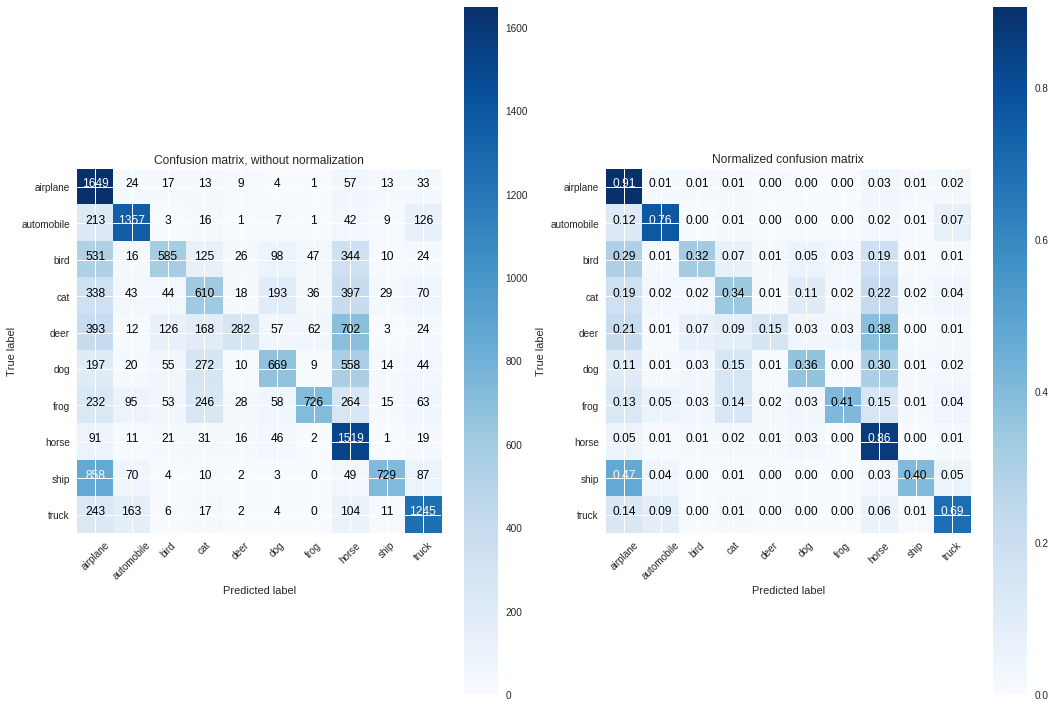

In [0]:
y_pred_test=modele.predict_classes(x_test)
cm = confusion_matrix(y_test,y_pred_test)
# Plot non-normalized confusion matrix
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plot_confusion_matrix(cm, label_names, False,'Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(1,2,2)
plot_confusion_matrix(cm, label_names, True,'Normalized confusion matrix')

plt.show()

Se presenta la matriz de confusión, en forma no normalizada y en forma normalizada.

Se aprecia que el porcentaje de aciertos (la diagonal es bastante elevada). 

Se nota que el grueso de las confusiones fue entre barcos y aviones, y entre caballos con ciervos o perros. Al analizar las imágenes se nota que hay imágenes donde la clasificación no es clara y no puede 'culparse' a la red por no ser capaz de entregar una predicción correcta.

# **l)** Pesos y gradientes de la red convolucional

Elija una de las redes entrenadas (preferentemente una con buen desempeño) y visualice los pesos correspondientes a los filtros de la primera capa convolucional. Visualice además el efecto del filtro sobre algunas imágenes de entrenamiento. Repita el proceso para los pesos de la última capa convolucional; Comente y compare con los descriptores SIFT.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from keras.layers.core import Dense, Activation
from keras.layers import Dense, Activation
from keras import backend as k
import keras as K
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm

In [0]:
modell = Sequential()
modell.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:],W_regularizer=l2(0.01)))
modell.add(Activation('relu'))
modell.add(Dropout(0.25))
modell.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
modell.add(Conv2D(64, (3, 3), padding='same',W_regularizer=l2(0.01)))
modell.add(Activation('relu'))
modell.add(Dropout(0.25))
modell.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
modell.add(Flatten())
modell.add(Dense(512))
modell.add(Activation('relu'))
modell.add(Dropout(0.25))
modell.add(Dense(10))
modell.add(Activation('softmax'))
modell.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", input_shape=(32, 32, 3..., kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", kernel_regularizer=<keras.reg...)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_6 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
__________

In [0]:
C1_model=modell
X_train_scaled = x_train_norm[0:1]

In [0]:
C1_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_6 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
__________

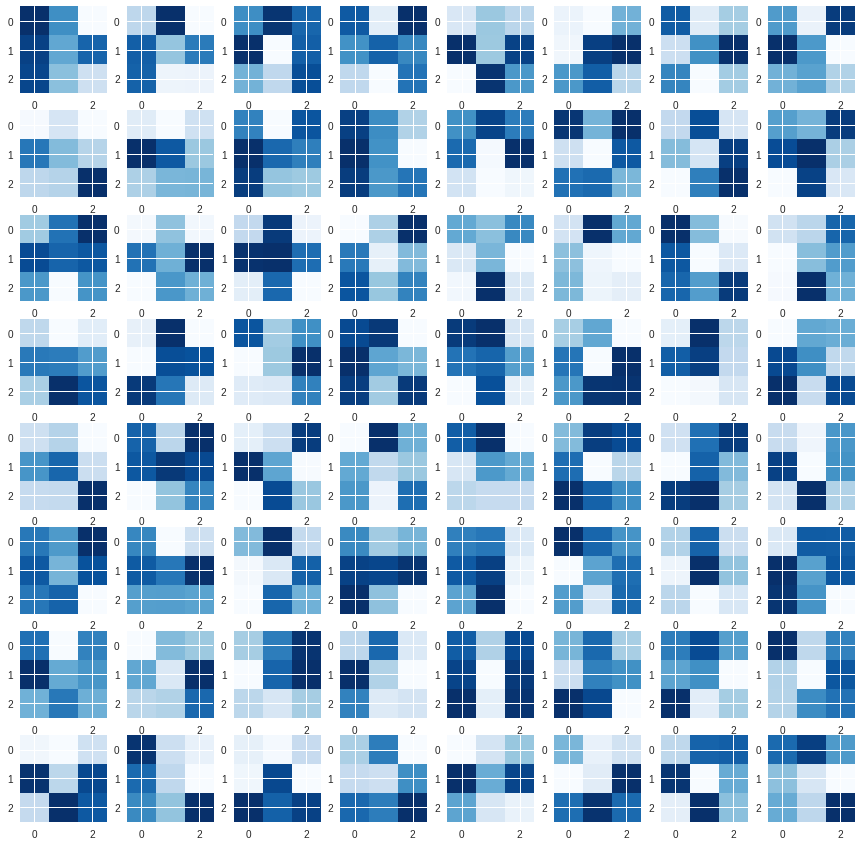

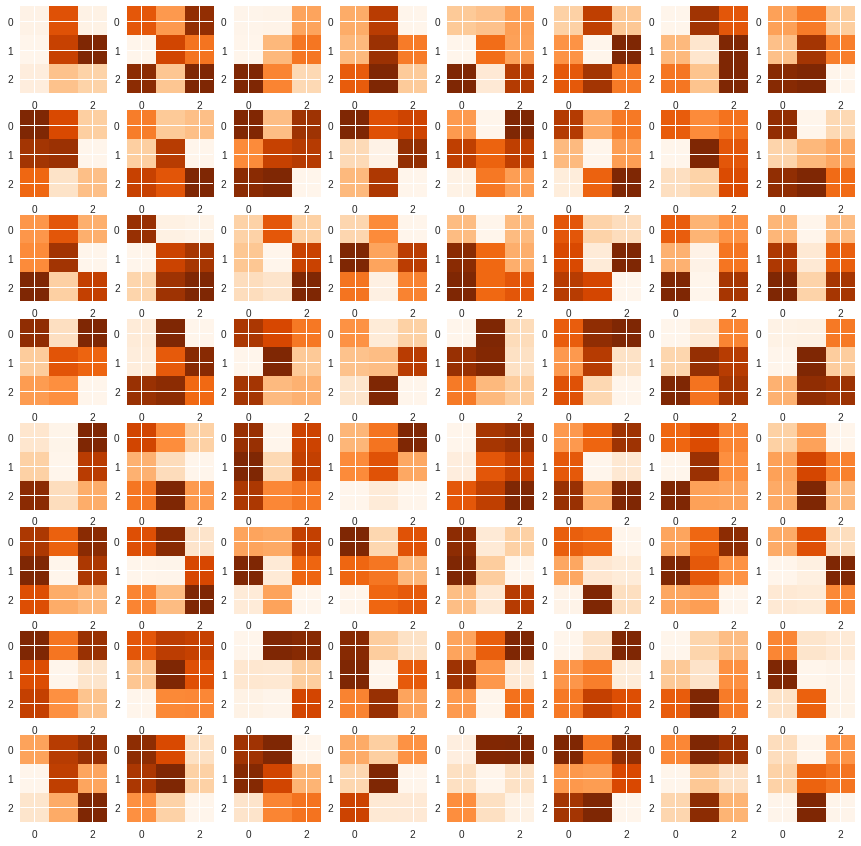

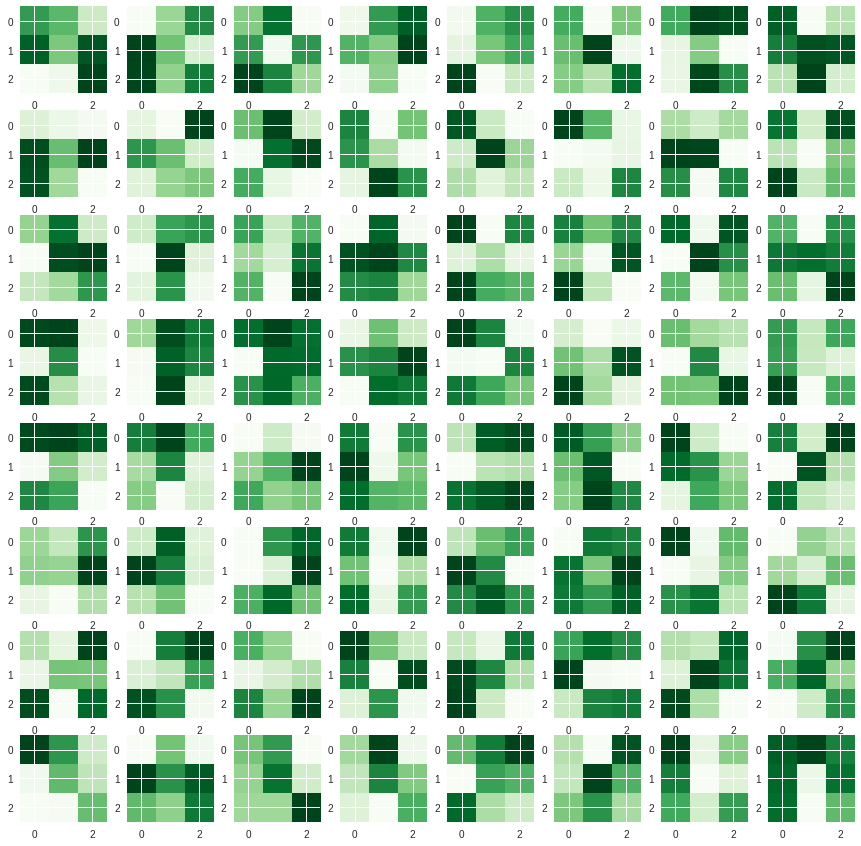

In [0]:
colores= ["Blues","Oranges","Greens"]
for j in range(3):
  plt.figure(figsize=(15,15))
  x1w = C1_model.get_weights()[0][:,:,j,:]
  for i in range(1,65):
      plt.subplot(8,8,i)
      plt.imshow(x1w[:,:,i-1],interpolation="nearest",cmap=colores[j])



In [0]:

C1_model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=["accuracy"])
C1_model.fit(x_train_norm, y_train_categ, epochs=15, batch_size=32)

Epoch 1/15
30000/30000 [==============================] - 14s 477us/step - loss: 2.5459 - acc: 0.2878
Epoch 2/15
30000/30000 [==============================] - 14s 461us/step - loss: 2.1315 - acc: 0.3986
Epoch 3/15
30000/30000 [==============================] - 14s 461us/step - loss: 1.9572 - acc: 0.4396
Epoch 4/15
30000/30000 [==============================] - 14s 461us/step - loss: 1.8486 - acc: 0.4690
Epoch 5/15
30000/30000 [==============================] - 14s 459us/step - loss: 1.7640 - acc: 0.4881
Epoch 6/15
30000/30000 [==============================] - 14s 459us/step - loss: 1.6973 - acc: 0.5103
Epoch 7/15
30000/30000 [==============================] - 14s 460us/step - loss: 1.6420 - acc: 0.5267
Epoch 8/15
30000/30000 [==============================] - 14s 462us/step - loss: 1.6005 - acc: 0.5322
Epoch 9/15
30000/30000 [==============================] - 14s 458us/step - loss: 1.5580 - acc: 0.5508
Epoch 10/15
30000/30000 [==============================] - 14s 457us/step - loss: 

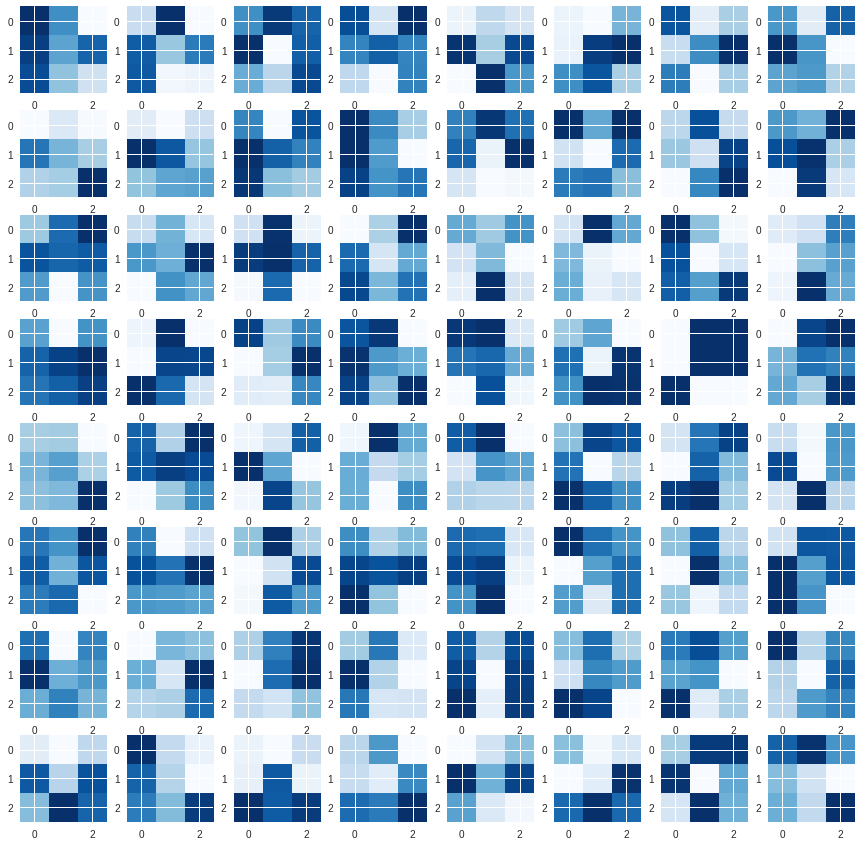

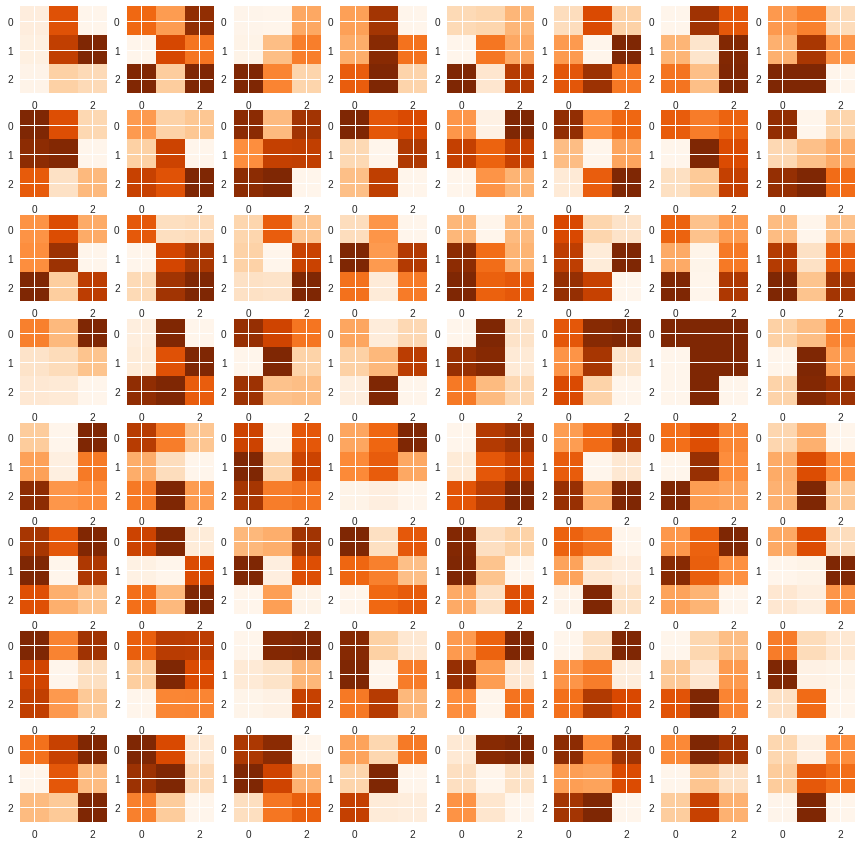

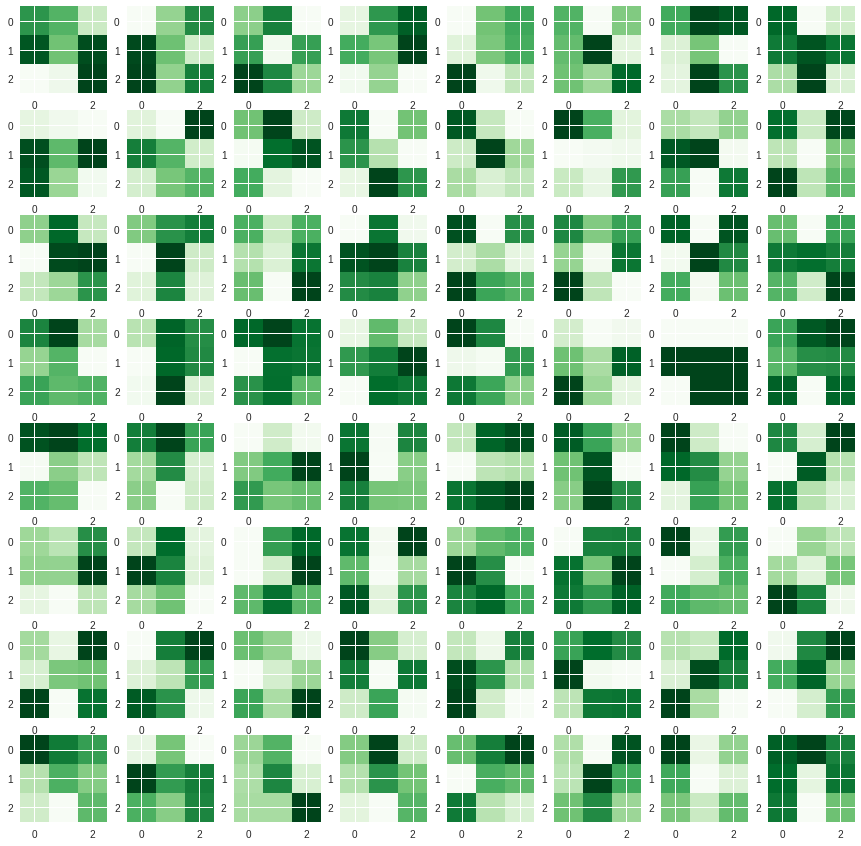

In [0]:
for j in range(3):
  plt.figure(figsize=(15,15))
  x1w = C1_model.get_weights()[0][:,:,j,:]
  for i in range(1,65):
      plt.subplot(8,8,i)
      plt.imshow(x1w[:,:,i-1],interpolation="nearest",cmap=colores[j])

Se aprecia que los gradientes adoptn formas geométricas identificables, lo que permite suponer el tipo de característica que busca reconocer. Esto se relaciona con la idea de los keypoints SIFT debido a que hace pensar que la red busca reconocer patrones en la imagen, los que se asemejan a un keypoint. Se nota para este caso que una neurona no se activa ante una misma imagen rotada, lo que reafirma el supuesto teórico de que son sensibles a error por rotación. 

Se espera que una alternativa capaz de seguir ambos caminos en paralelo logre resultados mejores a cada uno por separado.